## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 



In [8]:
batch_size = 100
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### MSE Threshold and Mean Coeff Values 

1. Fetch MSE threshold for training the ABC-GAN 
2. The ABC-GAN will be trained until the threshold MSE is achieved or until it completes 5000 epochs 
3. The threshold mse is the mean mse of Catboost over 10 runs

In [9]:
books = sb.read_notebooks('./BaseLine_Model_Output')
catboostMSE = []
for nb in books.notebooks: 
    catboostMSE.append(nb.scraps['Catboost MSE'].data)
    
#Threshold MSE     
threshold_mse = mean(catboostMSE)

print(threshold_mse)

0.10094117185431159


# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [10]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.034573
0:	learn: 0.9806058	total: 56.3ms	remaining: 56.2s
1:	learn: 0.9606716	total: 57.4ms	remaining: 28.6s
2:	learn: 0.9390920	total: 58.4ms	remaining: 19.4s
3:	learn: 0.9209237	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9046978	total: 60.4ms	remaining: 12s
5:	learn: 0.8896854	total: 61.5ms	remaining: 10.2s
6:	learn: 0.8724151	total: 62.5ms	remaining: 8.86s
7:	learn: 0.8558633	total: 63.5ms	remaining: 7.88s
8:	learn: 0.8400199	total: 64.3ms	remaining: 7.08s
9:	learn: 0.8229065	total: 65.2ms	remaining: 6.45s
10:	learn: 0.8057776	total: 66.1ms	remaining: 5.94s
11:	learn: 0.7907426	total: 67ms	remaining: 5.52s
12:	learn: 0.7753485	total: 67.8ms	remaining: 5.15s
13:	learn: 0.7601130	total: 68.7ms	remaining: 4.83s
14:	learn: 0.7475256	total: 69.6ms	remaining: 4.57s
15:	learn: 0.7326054	total: 70.6ms	remaining: 4.34s
16:	learn: 0.7206853	total: 71.6ms	remaining: 4.14s
17:	learn: 0.7077303	total: 72.4ms	remaining: 3.95s
18:	learn: 0.6955287	total: 73.2ms	remaining: 3.

104:	learn: 0.3013455	total: 149ms	remaining: 1.27s
105:	learn: 0.2996238	total: 150ms	remaining: 1.26s
106:	learn: 0.2980370	total: 151ms	remaining: 1.26s
107:	learn: 0.2965967	total: 152ms	remaining: 1.25s
108:	learn: 0.2951864	total: 153ms	remaining: 1.25s
109:	learn: 0.2942861	total: 153ms	remaining: 1.24s
110:	learn: 0.2932928	total: 154ms	remaining: 1.24s
111:	learn: 0.2916150	total: 155ms	remaining: 1.23s
112:	learn: 0.2903158	total: 156ms	remaining: 1.22s
113:	learn: 0.2893044	total: 157ms	remaining: 1.22s
114:	learn: 0.2880453	total: 158ms	remaining: 1.21s
115:	learn: 0.2868924	total: 158ms	remaining: 1.21s
116:	learn: 0.2854905	total: 159ms	remaining: 1.2s
117:	learn: 0.2838426	total: 160ms	remaining: 1.2s
118:	learn: 0.2827228	total: 161ms	remaining: 1.19s
119:	learn: 0.2820207	total: 162ms	remaining: 1.19s
120:	learn: 0.2807575	total: 162ms	remaining: 1.18s
121:	learn: 0.2800950	total: 163ms	remaining: 1.18s
122:	learn: 0.2793606	total: 164ms	remaining: 1.17s
123:	learn: 0.

153:	learn: 0.2507161	total: 192ms	remaining: 1.05s
154:	learn: 0.2497802	total: 193ms	remaining: 1.05s
155:	learn: 0.2490613	total: 194ms	remaining: 1.05s
156:	learn: 0.2484356	total: 195ms	remaining: 1.04s
157:	learn: 0.2475208	total: 196ms	remaining: 1.04s
158:	learn: 0.2467460	total: 197ms	remaining: 1.04s
159:	learn: 0.2461317	total: 197ms	remaining: 1.04s
160:	learn: 0.2456028	total: 198ms	remaining: 1.03s
161:	learn: 0.2449256	total: 199ms	remaining: 1.03s
162:	learn: 0.2444113	total: 200ms	remaining: 1.03s
163:	learn: 0.2438126	total: 201ms	remaining: 1.02s
164:	learn: 0.2432080	total: 202ms	remaining: 1.02s
165:	learn: 0.2425986	total: 203ms	remaining: 1.02s
166:	learn: 0.2421108	total: 204ms	remaining: 1.01s
167:	learn: 0.2413956	total: 205ms	remaining: 1.01s
168:	learn: 0.2407630	total: 205ms	remaining: 1.01s
169:	learn: 0.2401529	total: 206ms	remaining: 1.01s
170:	learn: 0.2391465	total: 207ms	remaining: 1s
171:	learn: 0.2383087	total: 208ms	remaining: 1s
172:	learn: 0.2377

327:	learn: 0.1684932	total: 339ms	remaining: 695ms
328:	learn: 0.1680740	total: 340ms	remaining: 694ms
329:	learn: 0.1676495	total: 341ms	remaining: 693ms
330:	learn: 0.1672606	total: 342ms	remaining: 691ms
331:	learn: 0.1669891	total: 343ms	remaining: 690ms
332:	learn: 0.1666284	total: 344ms	remaining: 688ms
333:	learn: 0.1664670	total: 345ms	remaining: 687ms
334:	learn: 0.1660441	total: 345ms	remaining: 686ms
335:	learn: 0.1657088	total: 346ms	remaining: 684ms
336:	learn: 0.1653987	total: 347ms	remaining: 683ms
337:	learn: 0.1652355	total: 348ms	remaining: 682ms
338:	learn: 0.1648615	total: 349ms	remaining: 680ms
339:	learn: 0.1646361	total: 350ms	remaining: 679ms
340:	learn: 0.1643424	total: 350ms	remaining: 677ms
341:	learn: 0.1641025	total: 351ms	remaining: 676ms
342:	learn: 0.1637969	total: 352ms	remaining: 675ms
343:	learn: 0.1634989	total: 353ms	remaining: 674ms
344:	learn: 0.1631288	total: 354ms	remaining: 673ms
345:	learn: 0.1630031	total: 355ms	remaining: 671ms
346:	learn: 

371:	learn: 0.1560608	total: 382ms	remaining: 646ms
372:	learn: 0.1558547	total: 384ms	remaining: 645ms
373:	learn: 0.1555605	total: 385ms	remaining: 644ms
374:	learn: 0.1552292	total: 386ms	remaining: 644ms
375:	learn: 0.1549435	total: 388ms	remaining: 643ms
376:	learn: 0.1546544	total: 389ms	remaining: 643ms
377:	learn: 0.1543066	total: 390ms	remaining: 642ms
378:	learn: 0.1540311	total: 391ms	remaining: 641ms
379:	learn: 0.1536233	total: 392ms	remaining: 640ms
380:	learn: 0.1533239	total: 393ms	remaining: 639ms
381:	learn: 0.1530299	total: 394ms	remaining: 638ms
382:	learn: 0.1528336	total: 396ms	remaining: 637ms
383:	learn: 0.1526162	total: 397ms	remaining: 636ms
384:	learn: 0.1523426	total: 398ms	remaining: 636ms
385:	learn: 0.1521042	total: 399ms	remaining: 635ms
386:	learn: 0.1518990	total: 400ms	remaining: 634ms
387:	learn: 0.1516118	total: 401ms	remaining: 633ms
388:	learn: 0.1513630	total: 403ms	remaining: 633ms
389:	learn: 0.1511214	total: 404ms	remaining: 632ms
390:	learn: 

519:	learn: 0.1247722	total: 529ms	remaining: 488ms
520:	learn: 0.1245918	total: 530ms	remaining: 487ms
521:	learn: 0.1243609	total: 531ms	remaining: 486ms
522:	learn: 0.1243283	total: 532ms	remaining: 485ms
523:	learn: 0.1241885	total: 532ms	remaining: 484ms
524:	learn: 0.1240465	total: 533ms	remaining: 482ms
525:	learn: 0.1238986	total: 534ms	remaining: 481ms
526:	learn: 0.1237245	total: 535ms	remaining: 480ms
527:	learn: 0.1236307	total: 536ms	remaining: 479ms
528:	learn: 0.1233258	total: 537ms	remaining: 478ms
529:	learn: 0.1232458	total: 538ms	remaining: 477ms
530:	learn: 0.1230684	total: 539ms	remaining: 476ms
531:	learn: 0.1229753	total: 540ms	remaining: 475ms
532:	learn: 0.1229118	total: 540ms	remaining: 474ms
533:	learn: 0.1227483	total: 541ms	remaining: 472ms
534:	learn: 0.1227345	total: 542ms	remaining: 471ms
535:	learn: 0.1226136	total: 543ms	remaining: 470ms
536:	learn: 0.1225049	total: 544ms	remaining: 469ms
537:	learn: 0.1223317	total: 545ms	remaining: 468ms
538:	learn: 

568:	learn: 0.1166102	total: 571ms	remaining: 433ms
569:	learn: 0.1164306	total: 573ms	remaining: 432ms
570:	learn: 0.1162908	total: 574ms	remaining: 431ms
571:	learn: 0.1161027	total: 575ms	remaining: 430ms
572:	learn: 0.1159918	total: 576ms	remaining: 429ms
573:	learn: 0.1157478	total: 576ms	remaining: 428ms
574:	learn: 0.1155859	total: 577ms	remaining: 427ms
575:	learn: 0.1154385	total: 578ms	remaining: 425ms
576:	learn: 0.1153858	total: 579ms	remaining: 424ms
577:	learn: 0.1153157	total: 580ms	remaining: 423ms
578:	learn: 0.1150992	total: 581ms	remaining: 422ms
579:	learn: 0.1147799	total: 581ms	remaining: 421ms
580:	learn: 0.1146177	total: 582ms	remaining: 420ms
581:	learn: 0.1144786	total: 583ms	remaining: 419ms
582:	learn: 0.1143718	total: 584ms	remaining: 418ms
583:	learn: 0.1142120	total: 585ms	remaining: 416ms
584:	learn: 0.1139755	total: 585ms	remaining: 415ms
585:	learn: 0.1137566	total: 586ms	remaining: 414ms
586:	learn: 0.1135706	total: 587ms	remaining: 413ms
587:	learn: 

738:	learn: 0.0927183	total: 719ms	remaining: 254ms
739:	learn: 0.0925957	total: 720ms	remaining: 253ms
740:	learn: 0.0925025	total: 721ms	remaining: 252ms
741:	learn: 0.0923401	total: 721ms	remaining: 251ms
742:	learn: 0.0923163	total: 722ms	remaining: 250ms
743:	learn: 0.0921469	total: 723ms	remaining: 249ms
744:	learn: 0.0920264	total: 724ms	remaining: 248ms
745:	learn: 0.0918709	total: 725ms	remaining: 247ms
746:	learn: 0.0917286	total: 726ms	remaining: 246ms
747:	learn: 0.0916813	total: 726ms	remaining: 245ms
748:	learn: 0.0915730	total: 727ms	remaining: 244ms
749:	learn: 0.0915436	total: 728ms	remaining: 243ms
750:	learn: 0.0914450	total: 729ms	remaining: 242ms
751:	learn: 0.0912826	total: 730ms	remaining: 241ms
752:	learn: 0.0911103	total: 731ms	remaining: 240ms
753:	learn: 0.0909450	total: 731ms	remaining: 239ms
754:	learn: 0.0908138	total: 732ms	remaining: 238ms
755:	learn: 0.0907134	total: 733ms	remaining: 237ms
756:	learn: 0.0906398	total: 734ms	remaining: 236ms
757:	learn: 

788:	learn: 0.0868796	total: 762ms	remaining: 204ms
789:	learn: 0.0867424	total: 763ms	remaining: 203ms
790:	learn: 0.0866955	total: 764ms	remaining: 202ms
791:	learn: 0.0865584	total: 765ms	remaining: 201ms
792:	learn: 0.0864905	total: 766ms	remaining: 200ms
793:	learn: 0.0863819	total: 767ms	remaining: 199ms
794:	learn: 0.0863573	total: 768ms	remaining: 198ms
795:	learn: 0.0862351	total: 769ms	remaining: 197ms
796:	learn: 0.0861251	total: 769ms	remaining: 196ms
797:	learn: 0.0860579	total: 770ms	remaining: 195ms
798:	learn: 0.0860072	total: 771ms	remaining: 194ms
799:	learn: 0.0859006	total: 772ms	remaining: 193ms
800:	learn: 0.0858199	total: 773ms	remaining: 192ms
801:	learn: 0.0856808	total: 773ms	remaining: 191ms
802:	learn: 0.0855259	total: 774ms	remaining: 190ms
803:	learn: 0.0854329	total: 775ms	remaining: 189ms
804:	learn: 0.0853917	total: 776ms	remaining: 188ms
805:	learn: 0.0852416	total: 777ms	remaining: 187ms
806:	learn: 0.0851578	total: 778ms	remaining: 186ms
807:	learn: 

960:	learn: 0.0716086	total: 910ms	remaining: 36.9ms
961:	learn: 0.0715439	total: 911ms	remaining: 36ms
962:	learn: 0.0714557	total: 912ms	remaining: 35ms
963:	learn: 0.0713766	total: 913ms	remaining: 34.1ms
964:	learn: 0.0713120	total: 914ms	remaining: 33.1ms
965:	learn: 0.0712524	total: 915ms	remaining: 32.2ms
966:	learn: 0.0711092	total: 916ms	remaining: 31.2ms
967:	learn: 0.0710991	total: 916ms	remaining: 30.3ms
968:	learn: 0.0709569	total: 917ms	remaining: 29.3ms
969:	learn: 0.0708275	total: 918ms	remaining: 28.4ms
970:	learn: 0.0707121	total: 919ms	remaining: 27.4ms
971:	learn: 0.0706513	total: 920ms	remaining: 26.5ms
972:	learn: 0.0705804	total: 921ms	remaining: 25.6ms
973:	learn: 0.0705152	total: 922ms	remaining: 24.6ms
974:	learn: 0.0704742	total: 923ms	remaining: 23.7ms
975:	learn: 0.0704049	total: 924ms	remaining: 22.7ms
976:	learn: 0.0703682	total: 925ms	remaining: 21.8ms
977:	learn: 0.0703054	total: 926ms	remaining: 20.8ms
978:	learn: 0.0702458	total: 926ms	remaining: 19.9

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06978490408608157


#### Sanity Checks 

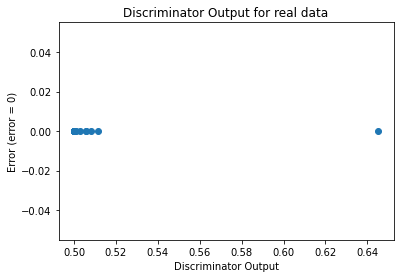

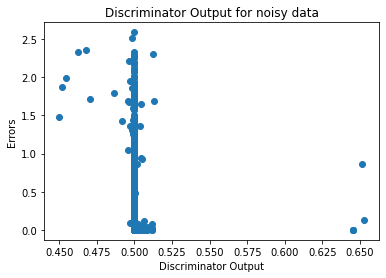

In [14]:
sanityChecks.discProbVsError(real_dataset,disc,device)

**Training ABC-GAN until mse of y_pred is > baseline_mse or n_epochs < 5000**

In [15]:
gen2 = network.Generator(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

In [16]:
discLossA2,genLossA2 = ABC_train_test2.training_GAN_2(disc2,gen2,disc_opt,gen_opt,train_data,test_data,batch_size,threshold_mse,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_2 Generator Loss",genLossA2)
sb.glue("ABC_GAN_2 Discriminator Loss",discLossA2)

Number of epochs 29


In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,"2",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MSE")
print(mean(ABC_GAN2_metrics[0]))

MSE
0.08541088073799717


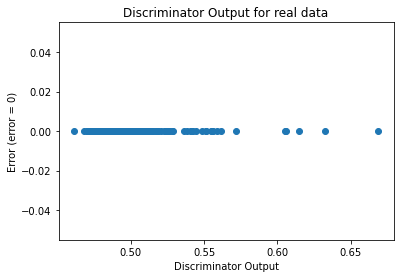

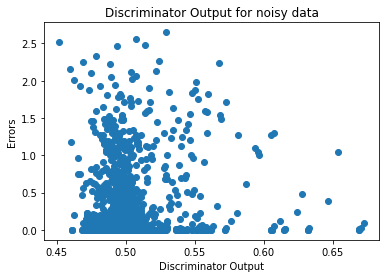

In [18]:
sanityChecks.discProbVsError(real_dataset,disc2,device)

# ABC - GAN Model with skip connection

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.015451014292656698


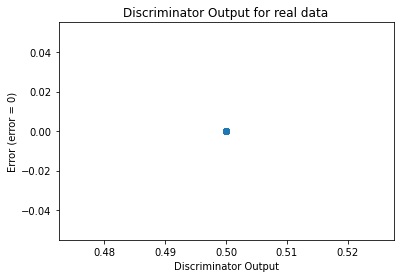

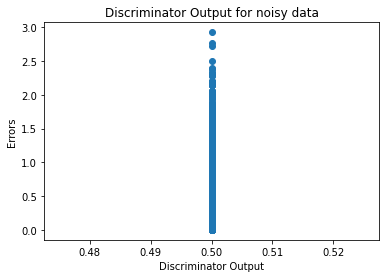

In [22]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [23]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0111]], requires_grad=True)
